<a href="https://colab.research.google.com/github/yogeshkumar22/NFL_2018/blob/main/Knowing%20the%20NFL%20players/Knowing_the_NFL_players.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Knowing the NFL players

The second dataset that we will be looking is the dataset containing infromation about the NFL players. Such kind of datasets are very helpful in giving us an idea about the physical attributes of a player and the distribution of player statistics amongst different team positions.

This dataset contains the following information:

- nflId: Player identification number, unique across players (numeric)

- height: Player height (text)

- weight: Player weight (numeric)

- birthDate: Date of birth (YYYY-MM-DD)

- collegeName: Player college (text)

- position: Player position (text)

- displayName: Player name (text)

Let us start by importing the necessary libraries,

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Next, importing the CSV file called `players.csv` which contains information about the NFL players.

In [2]:
# Reading in the CSV file as a DataFrame 
players_df = pd.read_csv('players.csv')

In [3]:
# Looking at the first five rows
players_df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell


Let us also view the shape of the DataFrame to know how many players are present in the dataset.

In [4]:
# Viewing the shape of the DataFrame
players_df.shape

(1303, 7)

Before we begin, let us convert the date columns to Pandas datetime values.

In [5]:
# Converting to datetime.date values
players_df['birthDate'] = pd.to_datetime(players_df['birthDate']).dt.date

# Extracting the year
players_df['birthYear'] = pd.to_datetime(players_df['birthDate']).dt.year

# Looking at the first five rows
players_df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993


Let us start our analysis by finding the age distribution of the NFL players. For this, we will have to find the age of the players in respect to the year 2018.

In [6]:
# Finding the age of the players
players_df['age'] = 2018 - players_df['birthYear']

# Looking at the first five rows
players_df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,27
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994,24
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993,25


Since, we have the function we made in the previous lesson, we can use it to find the age distribution of the players easily.

In [7]:
def find_dist(df, col_name):
    
    # Checking the frequency of games in relation to the column values
    dist = df[col_name].value_counts().reset_index()
    
    # Renaming the columns
    dist.columns = [col_name, 'frequency']
        
    # Sorting the DataFrame based on the column values
    sorted_dist = dist.sort_values(col_name, ascending=True).set_index(col_name)

    # Plotting a bar plot
    sorted_dist.plot(kind='bar', figsize=(20,4))

    # Return a boolean indicating the function was successfully executed
    return True

True

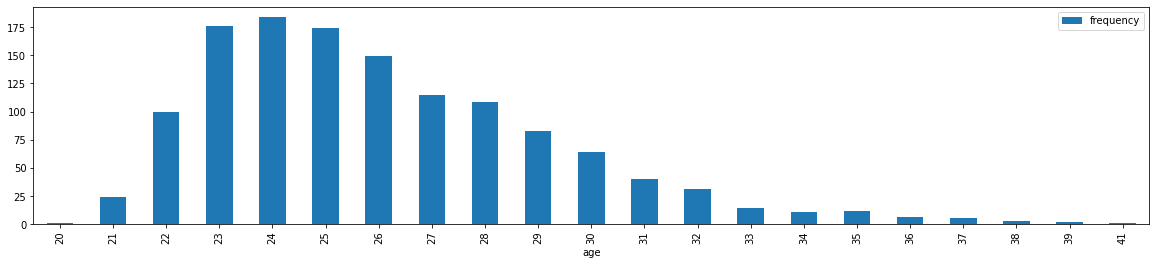

In [8]:
# Visualizing frequency distribution of players in relation to their age
find_dist(players_df, 'age')

Next, let us also see how the players are distributed amongst different team positions.

In [9]:
# Looking at the first five rows
players_df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,27
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994,24
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993,25


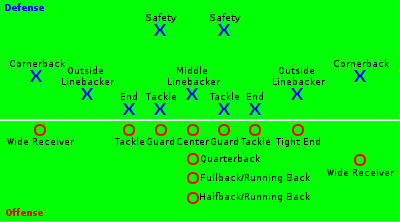

True

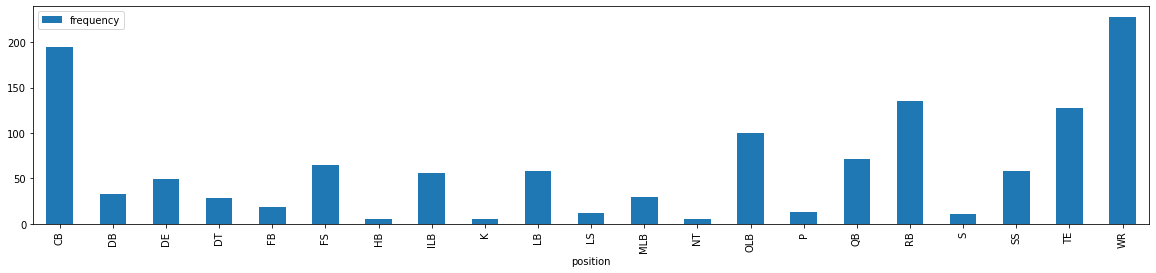

In [10]:
# Visualizing frequency distribution of players in relation to their positions
find_dist(players_df, 'position')

Now, let us look at how the age distribution of players in the CB (Cornerback) and WR (Wide Receiver) positions. For this, we can select the data points for either of the positions and then, find their age distribution.

In [11]:
# Selecting position = CB
players_df.query('position == "CB"')

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
6,2556445,70,211,1992-10-20,Florida,CB,Brian Poole,1992,26
28,2552689,71,193,1994-01-02,Florida State,CB,Ronald Darby,1994,24
29,2555383,72,191,1994-04-06,Louisiana State,CB,Jalen Mills,1994,24
...,...,...,...,...,...,...,...,...,...
1228,2561316,70,185,1996-02-02,Utah State,CB,Jalen Davis,1996,22
1241,2556371,72,200,1992-09-09,Texas A&M,CB,Brandon Williams,1992,26
1248,2558858,5-11,195,1994-06-25,Auburn,CB,Joshua Holsey,1994,24
1278,2558819,6-2,188,1994-12-04,Mississippi,CB,Derrick Jones,1994,24


True

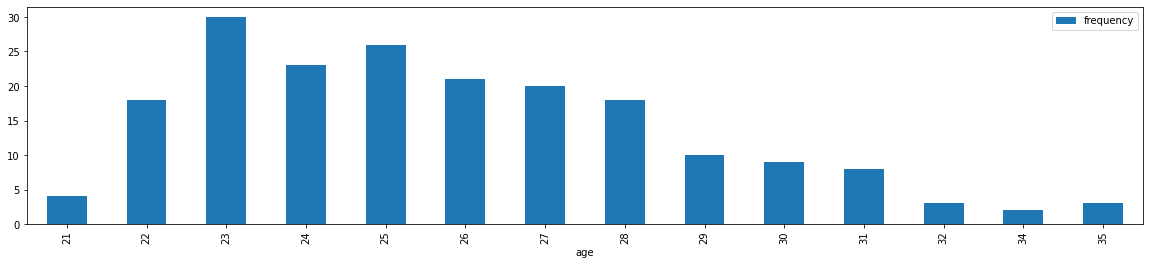

In [12]:
# Visualizing frequency distribution of players in relation to the CB position
find_dist(players_df.query('position == "CB"'), 'age')

True

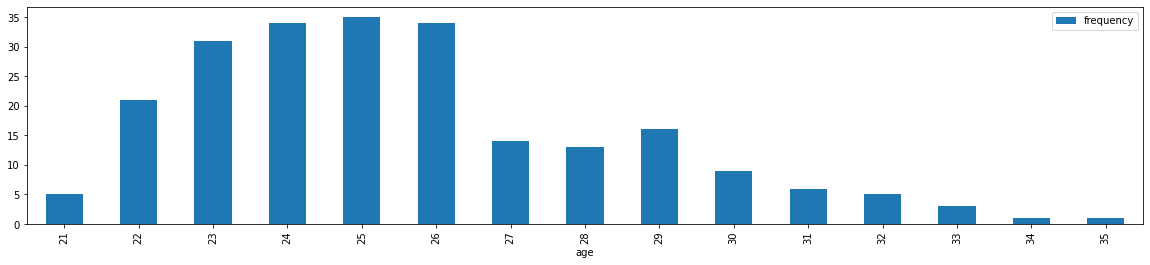

In [13]:
# Visualizing frequency distribution of players in relation to the WR position
find_dist(players_df.query('position == "WR"'), 'age')

Now, let us look at the actual height and weight distribution of the players. However, their is some inconsistency in the data in the `height` column.

In [14]:
# Looking at the first twenty rows
players_df.head(20)

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,27
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994,24
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993,25
5,2555543,73,216,1995-07-26,Florida,FS,Keanu Neal,1995,23
6,2556445,70,211,1992-10-20,Florida,CB,Brian Poole,1992,26
7,2507763,6-0,200,1986-08-01,Mississippi,WR,Mike Wallace,1986,32
8,2532842,78,243,1989-01-20,Arizona,QB,Nick Foles,1989,29
9,2540158,77,250,1990-11-10,Stanford,TE,Zach Ertz,1990,28


Let us fix it by converting all datapoints to inches.

In [15]:
# Fixing the inconsistency by converting all data to inches
players_df['height'] = players_df['height'].apply(lambda x: int(x[0])*12 + int(x[2]) if '-' in x else int(x))

# Looking at the first twenty rows
players_df.head(20)

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,27
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994,24
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993,25
5,2555543,73,216,1995-07-26,Florida,FS,Keanu Neal,1995,23
6,2556445,70,211,1992-10-20,Florida,CB,Brian Poole,1992,26
7,2507763,72,200,1986-08-01,Mississippi,WR,Mike Wallace,1986,32
8,2532842,78,243,1989-01-20,Arizona,QB,Nick Foles,1989,29
9,2540158,77,250,1990-11-10,Stanford,TE,Zach Ertz,1990,28


Now, instead of looking at the height and weight distribution of players seperately, let us look at them together by making a joint plot.

In [16]:
# Extracting the height values
players_df['height'].values

array([72, 70, 69, ..., 78, 69, 74])

In [17]:
# Assigning the height and weight values
height = players_df['height'].values
weight = players_df['weight'].values

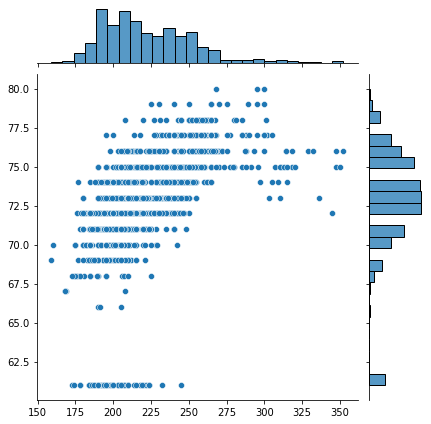

In [18]:
# Plotting a joint plot
sns.jointplot(weight, height)